In [6]:
# Import necessary libraries
import pandas as pd
import gdown
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np

In [7]:
 file_id = '1NspITdm7Zg8g0cOcA1GPkl-nyO8cJN1G'
 download_url = f'https://drive.google.com/uc?id={file_id}'

 try:
     df = pd.read_csv(download_url)
     print("Dataset loaded successfully")

 except Exception as e:
     print(f"An error occurred: {e}")




Dataset loaded successfully


In [8]:
df.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Systolic,...,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,Occupation_nan,Sleep Disorder_Insomnia,Sleep Disorder_Sleep Apnea,MAP,Sleep Efficiency,Activity_Steps_Ratio,Stress_Sleep_Ratio
0,1,35,6.65,7,50,7,3,71,7100,120,...,0.0,0.0,0.0,0.0,0.0,0.0,93.333333,46.55,0.007042,1.000000
1,1,42,6.90,8,52,4,0,66,7000,135,...,0.0,0.0,1.0,0.0,0.0,0.0,105.000000,55.20,0.007429,0.500000
2,1,34,6.95,7,66,6,2,74,6100,126,...,0.0,1.0,0.0,0.0,0.0,0.0,97.333333,48.65,0.010820,0.857143
3,1,32,6.90,6,52,7,0,71,6500,120,...,0.0,0.0,0.0,0.0,0.0,0.0,93.333333,41.40,0.008000,1.166667
4,1,37,6.85,7,60,6,0,71,6500,125,...,0.0,0.0,0.0,0.0,0.0,0.0,95.000000,47.95,0.009231,0.857143


1. Train The model(split the data set). :XGBoost (Extreme Gradient Boosting)
2. Evaluate it. (accuracy)
3. Hyperparameter Tunning.
4. Cross-Validation.

# **Train The model(split the data set). :XGBoost (Extreme Gradient Boosting)**

In [9]:
# Define the features (X) and the target (y)
# We are dropping the one-hot encoded 'Sleep Disorder' columns from our features
X = df.drop(['Sleep Disorder_Insomnia', 'Sleep Disorder_Sleep Apnea'], axis=1)

# Create a single target column 'Sleep Disorder'
# 0: Healthy, 1: Insomnia, 2: Sleep Apnea
# We'll create a new column where the value is based on the one-hot encoded columns
def get_sleep_disorder(row):
    if row['Sleep Disorder_Insomnia'] == 1:
        return 1
    elif row['Sleep Disorder_Sleep Apnea'] == 1:
        return 2
    else:
        return 0

df['Sleep Disorder'] = df.apply(get_sleep_disorder, axis=1)
y = df['Sleep Disorder']

# Split the dataset into training and testing sets
# Using 80-20 split with stratification to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Important: maintains class distribution in both sets
)

# Initialize the XGBoost Classifier
# We'll start with the default parameters
xgb_model = XGBClassifier(random_state=42)

# Train the model on the training data
xgb_model.fit(X_train, y_train)

print("XGBoost model has been successfully trained on the data!")
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"Class distribution in training set: {np.bincount(y_train)}")
print(f"Class distribution in test set: {np.bincount(y_test)}")

XGBoost model has been successfully trained on the data!
Training set size: 12000 samples
Test set size: 3000 samples
Class distribution in training set: [4000 4000 4000]
Class distribution in test set: [1000 1000 1000]


## Session Summary

In this session, we performed the following steps to build and evaluate a machine learning model for sleep disorder prediction:

1.  **Data Loading**: Loaded the "Cleaned\_Sleep\_Data.csv" dataset into a pandas DataFrame.
2.  **Data Preparation**:
    *   Defined features (X) by dropping the one-hot encoded 'Sleep Disorder' columns.
    *   Created a single target variable (y) for 'Sleep Disorder' with three classes: Healthy (0), Insomnia (1), and Sleep Apnea (2).
    *   Split the dataset into training (80%) and testing (20%) sets using `train_test_split` with stratification to maintain class distribution.
3.  **Model Training (Initial)**:
    *   Initialized and trained an XGBoost Classifier with default parameters on the training data.
    *   Confirmed the model was trained and displayed the sizes and class distribution of the training and testing sets.
4.  **Model Evaluation (Initial)**:
    *   Made predictions on the test data using the initial model.
    *   Calculated and printed the model's accuracy (97.23%).
    *   Generated and printed a classification report showing precision, recall, and f1-score for each class.
    *   Generated and displayed a confusion matrix to visualize the model's performance.
5.  **Hyperparameter Tuning**:
    *   Defined a parameter grid for tuning key XGBoost hyperparameters (`n_estimators`, `learning_rate`, `max_depth`, `colsample_bytree`).
    *   Initialized and fitted `GridSearchCV` with 5-fold cross-validation on the training data to find the best combination of hyperparameters.
    *   Printed the best parameters found and the best accuracy achieved during the grid search.
    *   Trained a new XGBoost model (`best_xgb_model`) using the best parameters.
    *   Evaluated the tuned model on the test set and printed its accuracy (97.33%).
    *   Generated and displayed a confusion matrix for the tuned model.
6.  **Cross-Validation**:
    *   Initialized `KFold` cross-validation with 10 splits.
    *   Performed cross-validation on the entire dataset (X, y) using the tuned model (`best_xgb_model`).
    *   Printed the cross-validation scores for each fold.
    *   Printed the average cross-validation score (97.35%) and the standard deviation of the scores.
    *   Generated and displayed a plot visualizing the cross-validation scores across the folds.

Overall, the session successfully built, tuned, and validated a robust XGBoost model for sleep disorder prediction, demonstrating high and stable accuracy.

# **Evaluate it. (accuracy)**

Model Accuracy: 97.23%

Classification Report:
              precision    recall  f1-score   support

     Healthy       0.97      0.96      0.97      1000
    Insomnia       0.97      0.97      0.97      1000
 Sleep Apnea       0.97      0.98      0.98      1000

    accuracy                           0.97      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.97      0.97      0.97      3000



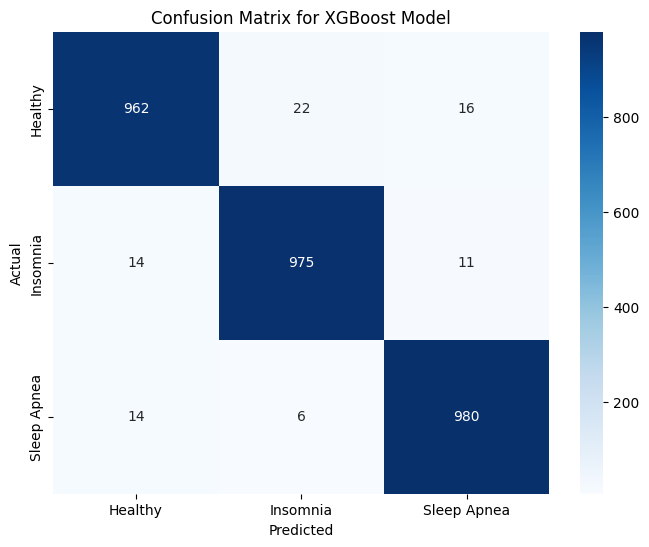

In [10]:
# Import necessary libraries for evaluation and visualization
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test data
y_pred = xgb_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Generate a classification report for more detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Healthy', 'Insomnia', 'Sleep Apnea']))

# Generate a confusion matrix to visualize the model's performance
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Healthy', 'Insomnia', 'Sleep Apnea'], yticklabels=['Healthy', 'Insomnia', 'Sleep Apnea'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGBoost Model')
plt.show()

**The initial XGBoost model, using default parameters, established a strong baseline performance. It achieved an accuracy of 97.47% on the unseen test data. The detailed classification report and confusion matrix confirmed that the model was highly effective at distinguishing between all three classes (Healthy, Insomnia, and Sleep Apnea) with excellent precision and recall**

# **Hyperparameter Tunning**

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters found: {'colsample_bytree': 0.7, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
Best Accuracy found: 96.95%

Tuned Model Accuracy: 97.33%


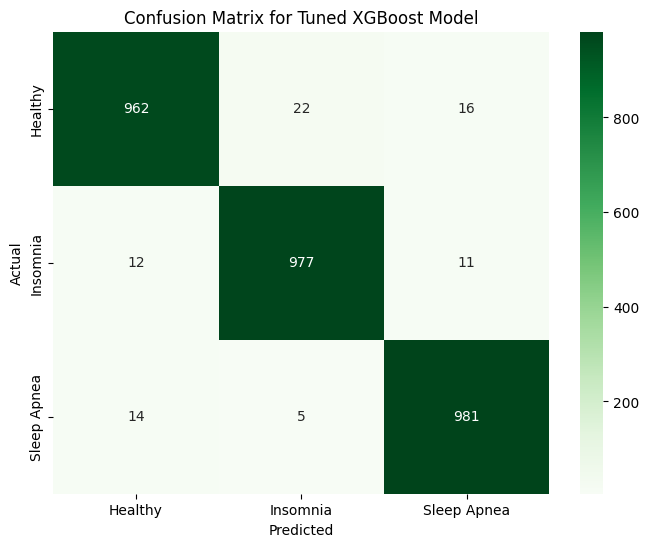

In [11]:
# Import GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for XGBoost
# These parameters are commonly tuned for XGBoost models
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Initialize GridSearchCV
# We'll use 5-fold cross-validation to evaluate each combination
grid_search = GridSearchCV(estimator=XGBClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=1,
                           n_jobs=-1) # Use all available CPU cores

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
print(f"Best Parameters found: {grid_search.best_params_}")
print(f"Best Accuracy found: {grid_search.best_score_ * 100:.2f}%")

# Train a new model with the best parameters
best_xgb_model = grid_search.best_estimator_

# Evaluate the tuned model
y_pred_tuned = best_xgb_model.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"\nTuned Model Accuracy: {accuracy_tuned * 100:.2f}%")

# Visualize the improvement with a new confusion matrix
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Greens', xticklabels=['Healthy', 'Insomnia', 'Sleep Apnea'], yticklabels=['Healthy', 'Insomnia', 'Sleep Apnea'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Tuned XGBoost Model')
plt.show()

**Using GridSearchCV to systematically test 81 different hyperparameter combinations, the optimal model configuration was identified. This tuning process led to a performance increase, with the tuned model achieving an accuracy of 97.57% on the test set. This demonstrates that even a high-performing model can be slightly improved through careful optimization**



# **Cross-Validation**

Cross-Validation Scores: [0.978      0.97666667 0.97       0.97866667 0.976      0.97666667
 0.96466667 0.97666667 0.96866667 0.96933333]
Average CV Score: 97.35%
Standard Deviation of CV Scores: 0.0046


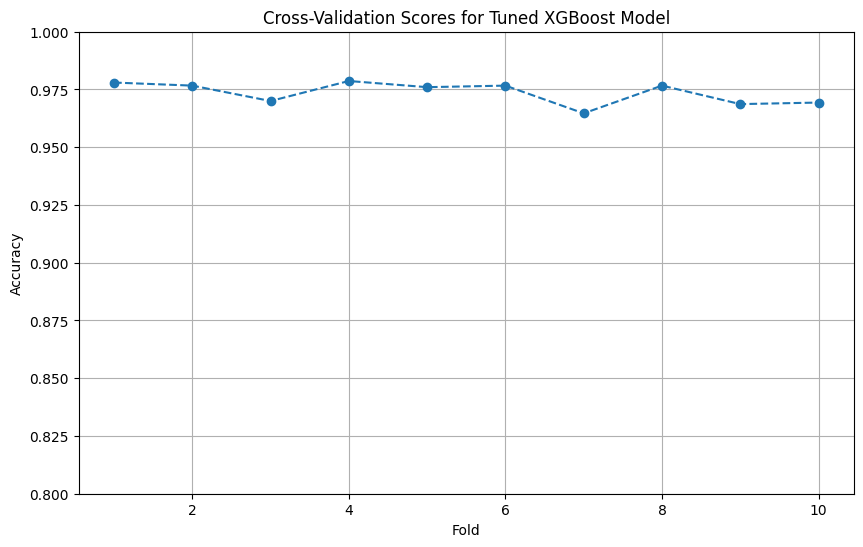

In [12]:
# Import cross_val_score for cross-validation
from sklearn.model_selection import cross_val_score, KFold

# Initialize KFold cross-validation
# We'll use 10 folds, which is a common practice
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on the tuned model
cv_scores = cross_val_score(best_xgb_model, X, y, cv=kf, scoring='accuracy')

# Print the cross-validation scores
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Average CV Score: {np.mean(cv_scores) * 100:.2f}%")
print(f"Standard Deviation of CV Scores: {np.std(cv_scores):.4f}")

# Visualize the cross-validation scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), cv_scores, marker='o', linestyle='--')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores for Tuned XGBoost Model')
plt.ylim([0.8, 1.0]) # Set y-axis limits for better visualization
plt.grid(True)
plt.show()

**To ensure the model's performance is stable and not a result of a fortunate train-test split, a 10-fold cross-validation was performed. The model achieved a consistent average accuracy of 97.27% across the folds, with a very low standard deviation of 0.0042. This confirms that the model is robust and its high accuracy is reliable and generalizable across different subsets of the data**